# Visualiser code for vibration testing

## Data prep

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time
import sys


path="/its/home/drs25/Documents/GitHub/TactileSensor/Code/Data collection/vibration/"
if sys.platform.startswith('win'):
    path="C:/Users/dexte/Documents/GitHub/TactileSensor/Code/Data collection/vibration/"
df = pd.read_csv(path+'vibration.csv')
print(df.keys())

merged_df=None
#merge all and average at each LED
for value in df['Rotation']:
    oneRotation=df.loc[df['Rotation'] == value]
    df2= oneRotation.groupby('LED_no').agg({'Rotation': 'first','s1': 'mean', 's2': 'mean', 's3': 'mean', 's4': 'mean'}).reset_index()
    if type(merged_df)==type(None):
        merged_df=df2.copy()
    else:
        merged_df = pd.merge(merged_df, df2)

#merge all and average at each rotation

averaged_all = oneRotation.groupby('LED_no').agg({'s1': 'mean', 's2': 'mean', 's3': 'mean', 's4': 'mean'}).reset_index()

Index(['Rotation', 'LED_no', 's1', 's2', 's3', 's4', 't'], dtype='object')


## circle plotter

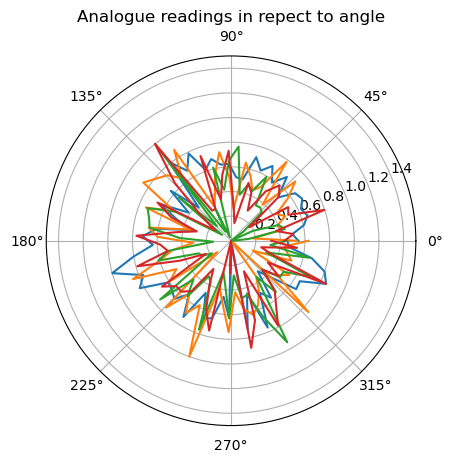

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def plotData(frame,keys=["s1","s2","s3","s4"]):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    for key in keys:
        audio_data = merged_df[key]  # Example random audio data

        # Normalize audio data to be between 0 and 1
        normalized_audio = (audio_data - np.min(audio_data)) / (np.max(audio_data) - np.min(audio_data))

        # Create polar plot
        time = np.linspace(0, 2 * np.pi, len(normalized_audio))  # Time values for the circle
        radius = normalized_audio  # Amplitude values as radius

        ax.plot(time, radius)
    ax.set_rmax(1.5)  # Set the maximum radius to 1 (normalized values)
    plt.title("Analogue readings in respect to angle")
    plt.show()

plotData(averaged_all)